In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df_clean=pd.read_csv('df-clean.csv')
df_clean.head().transpose()

,0,1,2,3,4
country,US,Spain,US,US,France
description,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,"This spent 20 months in 30% new French oak, an...","This is the top wine from La Bégude, named aft..."
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade
points,96,96,96,96,95
price,235.0,110.0,90.0,65.0,66.0
province,California,Northern Spain,California,Oregon,Provence
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend
winery,Heitz,Bodega Carmen Rodríguez,Macauley,Ponzi,Domaine de la Bégude


In [2]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

#print("stop_words: ", len(stop_words))
#print(stop_words)

def quitar_stop_words(texto): #función para quitar stopwords
    return " ".join([palabra for palabra in str(texto).split(' ') if palabra not in stop_words])


df_clean['clean_description']=df_clean['description'].apply(lambda x: quitar_stop_words(x))
df_clean.head().transpose()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1,2,3,4
country,US,Spain,US,US,France
description,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,"This spent 20 months in 30% new French oak, an...","This is the top wine from La Bégude, named aft..."
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade
points,96,96,96,96,95
price,235.0,110.0,90.0,65.0,66.0
province,California,Northern Spain,California,Oregon,Provence
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend
winery,Heitz,Bodega Carmen Rodríguez,Macauley,Ponzi,Domaine de la Bégude


In [3]:
#quitar signos de puntuación
import string
puntuacion_a_quitar = string.punctuation

print("puntuacion a quitar ---->", puntuacion_a_quitar)#


def quitar_punctuation(texto):
    aux1 = str.maketrans('','', puntuacion_a_quitar)
    #print(aux1)
    return texto.translate(aux1)

df_clean['clean_description1'] = df_clean['clean_description'].apply(lambda x: quitar_punctuation(x))

df_clean.head().transpose()

puntuacion a quitar ----> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,0,1,2,3,4
country,US,Spain,US,US,France
description,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,"This spent 20 months in 30% new French oak, an...","This is the top wine from La Bégude, named aft..."
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade
points,96,96,96,96,95
price,235.0,110.0,90.0,65.0,66.0
province,California,Northern Spain,California,Oregon,Provence
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend
winery,Heitz,Bodega Carmen Rodríguez,Macauley,Ponzi,Domaine de la Bégude


In [4]:
## pasar a minúsculas
df_clean['clean_description2']=df_clean['clean_description1'].str.lower()
df_clean.head().transpose()

,0,1,2,3,4
country,US,Spain,US,US,France
description,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,"This spent 20 months in 30% new French oak, an...","This is the top wine from La Bégude, named aft..."
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade
points,96,96,96,96,95
price,235.0,110.0,90.0,65.0,66.0
province,California,Northern Spain,California,Oregon,Provence
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend
winery,Heitz,Bodega Carmen Rodríguez,Macauley,Ponzi,Domaine de la Bégude


In [5]:
nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tona\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Tona\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [6]:

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

#print('wordnet_map', wordnet_map)

def lematizar(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    #print(pos_tagged_text)
    return " ".join([WordNetLemmatizer().lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

df_clean['clean_description3'] = df_clean['clean_description2'].apply(lambda text: lematizar(text))

df_clean.head()


,country,description,designation,points,price,province,region_1,region_2,variety,winery,clean_description,clean_description1,clean_description2,clean_description3
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,This tremendous 100% varietal wine hails Oakvi...,This tremendous 100 varietal wine hails Oakvil...,this tremendous 100 varietal wine hails oakvil...,this tremendous 100 varietal wine hail oakvill...
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,region_2_unknown,Tinta de Toro,Bodega Carmen Rodríguez,"Ripe aromas fig, blackberry cassis softened sw...",Ripe aromas fig blackberry cassis softened swe...,ripe aromas fig blackberry cassis softened swe...,ripe aromas fig blackberry cassis soften sweet...
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,Mac Watson honors memory wine made mother trem...,Mac Watson honors memory wine made mother trem...,mac watson honors memory wine made mother trem...,mac watson honor memory wine make mother treme...
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,"This spent 20 months 30% new French oak, incor...",This spent 20 months 30 new French oak incorpo...,this spent 20 months 30 new french oak incorpo...,this spend 20 months 30 new french oak incorpo...
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,region_2_unknown,Provence red blend,Domaine de la Bégude,"This top wine La Bégude, named highest point v...",This top wine La Bégude named highest point vi...,this top wine la bégude named highest point vi...,this top wine la bégude name highest point vin...


In [12]:

from collections import Counter

contador = Counter()
#print(contador)

for texto in df_clean['clean_description3'].values:
    for palabra in texto.split(' '):
        contador[palabra] += 1

print(contador.most_common()[0:10])

[('wine', 56284), ('flavor', 55329), ('fruit', 44348), ('the', 35496), ('finish', 30005), ('this', 26050), ('aromas', 23692), ('acidity', 21706), ('tannins', 21314), ('cherry', 19931)]


In [7]:
from textblob import TextBlob


# Análisis de sentimiento básico
df_clean['sentiment'] = df_clean['clean_description3'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_clean['subjectivity'] = df_clean['clean_description3'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Clasificar sentimientos
df_clean['sentiment_category'] = pd.cut(df_clean['sentiment'], 
                                 bins=[-1, -0.1, 0.1, 1],
                                 labels=['Negativo', 'Neutral', 'Positivo'])
df_clean.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
country,US,Spain,US,US,France,Spain,Spain,Spain,US,US
description,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,"This spent 20 months in 30% new French oak, an...","This is the top wine from La Bégude, named aft...","Deep, dense and pure from the opening bell, th...",Slightly gritty black-fruit aromas include a s...,Lush cedary black-fruit aromas are luxe and of...,This re-named vineyard was formerly bottled as...,The producer sources from two blocks of the vi...
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade,Numanthia,San Román,Carodorum Único Crianza,Silice,Gap's Crown Vineyard
points,96,96,96,96,95,95,95,95,95,95
price,235.0,110.0,90.0,65.0,66.0,73.0,65.0,110.0,65.0,60.0
province,California,Northern Spain,California,Oregon,Provence,Northern Spain,Northern Spain,Northern Spain,Oregon,California
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol,Toro,Toro,Toro,Chehalem Mountains,Sonoma Coast
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown,region_2_unknown,region_2_unknown,region_2_unknown,Willamette Valley,Sonoma
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend,Tinta de Toro,Tinta de Toro,Tinta de Toro,Pinot Noir,Pinot Noir
winery,Heitz,Bodega Carmen Rodríguez,Macauley,Ponzi,Domaine de la Bégude,Numanthia,Maurodos,Bodega Carmen Rodríguez,Bergström,Blue Farm


In [8]:
df_clean=df_clean.drop(columns=['clean_description2','clean_description1','clean_description'])
df_clean.to_csv('df_sentiment_clean.csv')

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97851 entries, 0 to 97850
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             97851 non-null  object  
 1   description         97851 non-null  object  
 2   designation         97851 non-null  object  
 3   points              97851 non-null  int64   
 4   price               97851 non-null  float64 
 5   province            97851 non-null  object  
 6   region_1            97851 non-null  object  
 7   region_2            97851 non-null  object  
 8   variety             97851 non-null  object  
 9   winery              97851 non-null  object  
 10  clean_description3  97851 non-null  object  
 11  sentiment           97851 non-null  float64 
 12  subjectivity        97851 non-null  float64 
 13  sentiment_category  97848 non-null  category
dtypes: category(1), float64(3), int64(1), object(9)
memory usage: 9.8+ MB


In [9]:

df_clean['sentiment_category'].value_counts()/len(df_clean)*100

sentiment_category
Positivo    63.873645
Neutral     30.002759
Negativo     6.120530
Name: count, dtype: float64

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [11]:
lista_desc = df_clean['clean_description3'].tolist()  # pasar a lista

print(len(lista_desc))
print(type(lista_desc))

97851
<class 'list'>


In [12]:
carct_todas_desc = " ".join(lista_desc)   # unir todos los tweets en una sola 
print(len(carct_todas_desc))

17097627


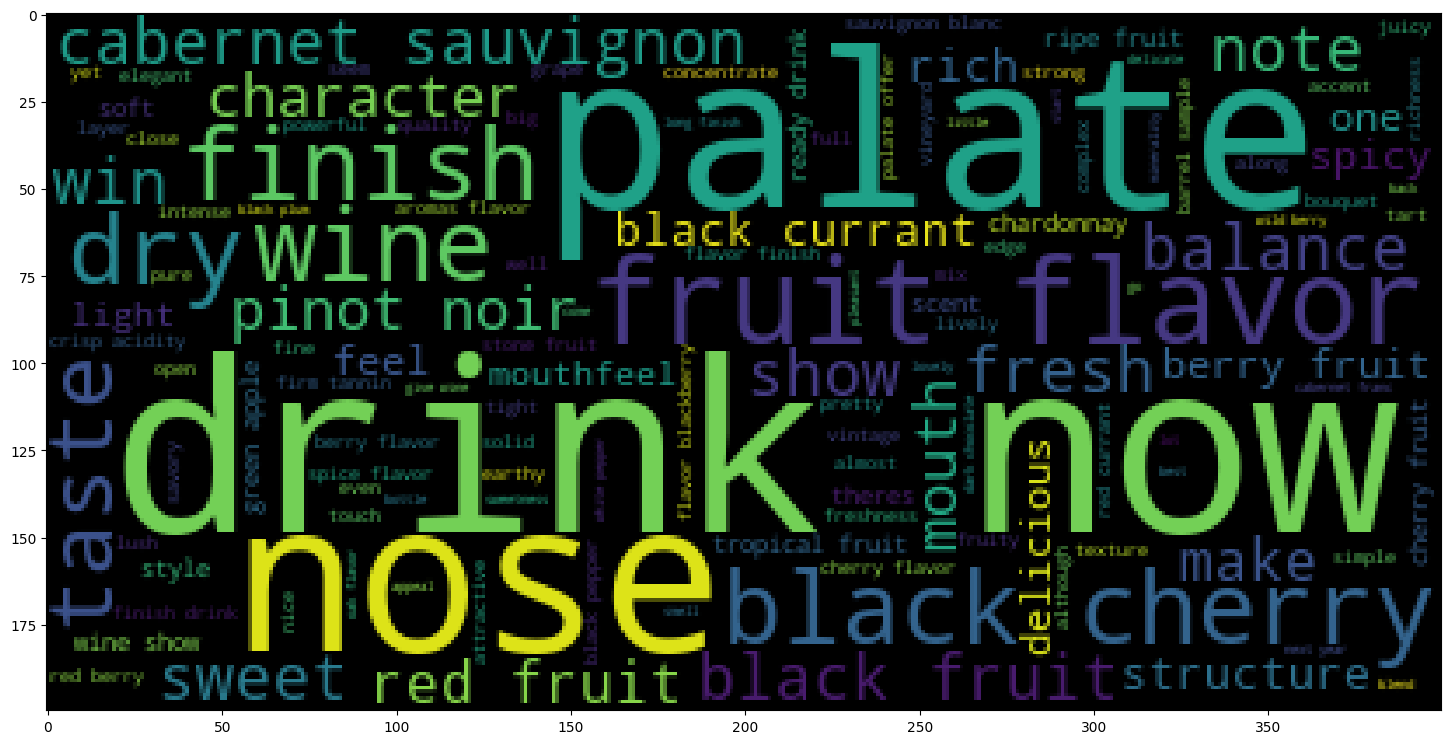

In [13]:
plt.figure(figsize = (18,12))
plt.imshow(WordCloud().generate(carct_todas_desc));

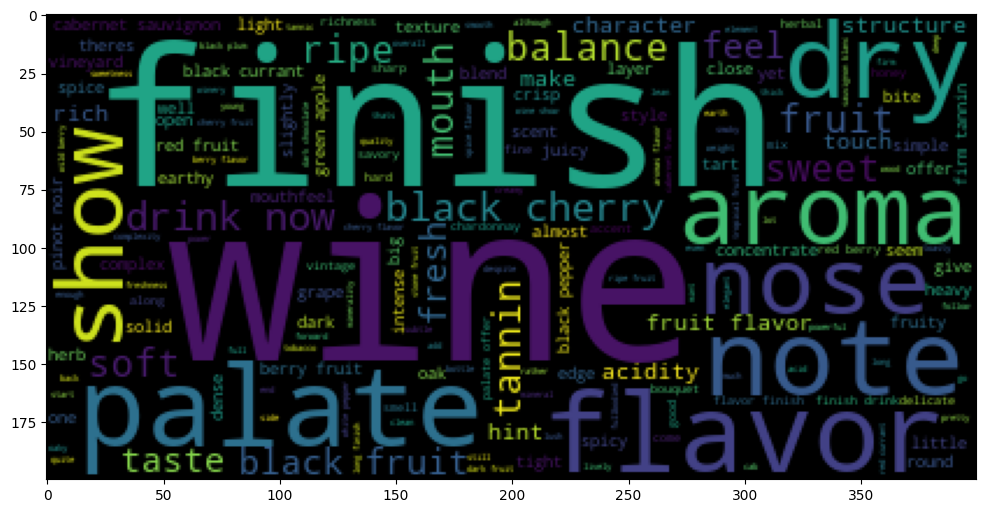

In [19]:
neutral_desc=df_clean[df_clean['sentiment_category']=='Neutral']
list_neutral=neutral_desc['clean_description3'].tolist()
neutros=" ".join(list_neutral)

plt.figure(figsize=(12,8))
plt.imshow(WordCloud().generate(neutros));

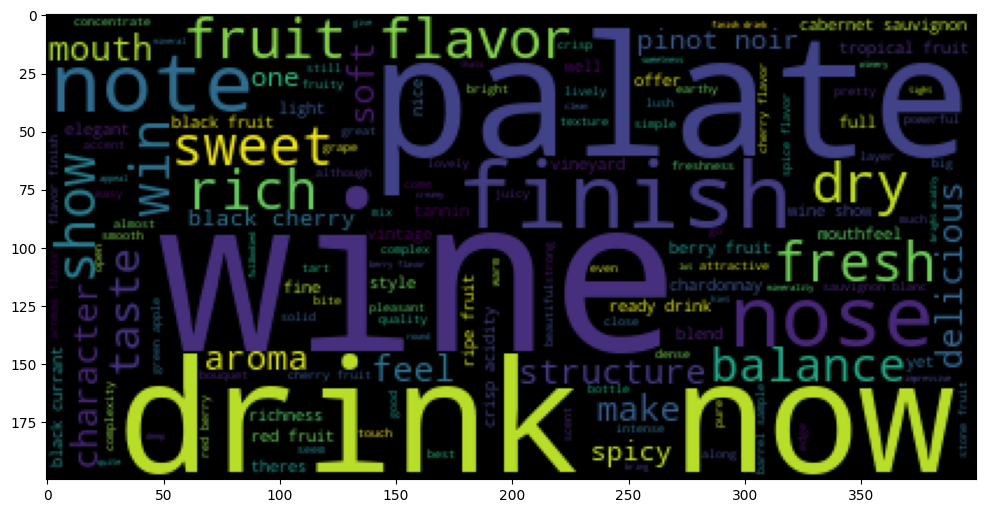

In [20]:
positive_desc=df_clean[df_clean['sentiment_category']=='Positivo']
list_pos=positive_desc['clean_description3'].tolist()
positive=" ".join(list_pos)

plt.figure(figsize=(12,8))
plt.imshow(WordCloud().generate(positive));

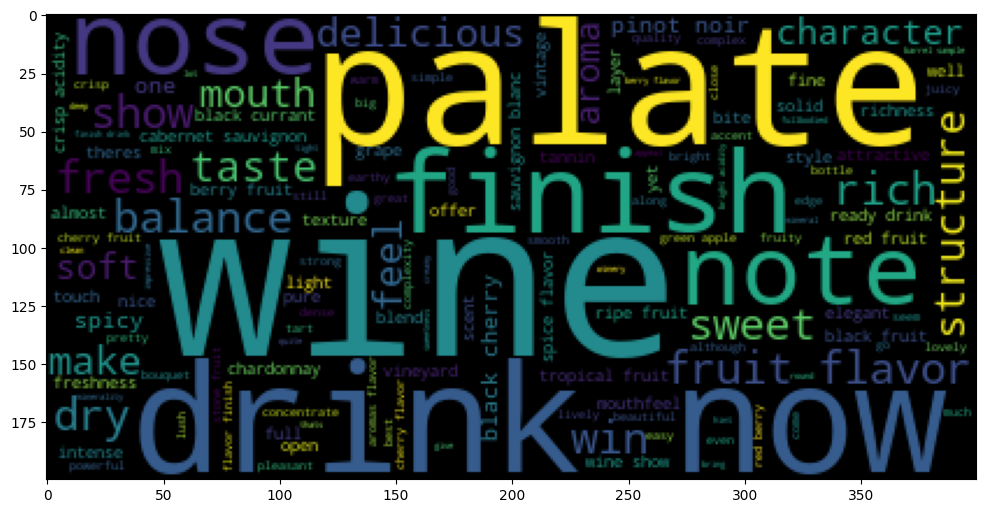

In [22]:
negative_desc=df_clean[df_clean['sentiment_category']=='Negativo']
list_neg=negative_desc['clean_description3'].tolist()
negative=" ".join(list_pos)

plt.figure(figsize=(12,8))
plt.imshow(WordCloud().generate(negative));

////////////////////////////////////////////////////////////////////////////////////////////  MACHINE   LEARNING /////////////////////////////////////////////////////////////

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df_clean['sentimiento_num']=df_clean['sentiment_category'].apply(lambda x: 1 if x == 'Positivo' else (-1 if x == 'Negativo' else 0))

#X_train['Gender'] = X_train['Gender'].apply(lambda x: 0 if x == 'Male' else (1 if x == 'Female' else 2))
df.sample(3).transpose()

In [ ]:
tfidf = TfidfVectorizer().fit_transform(df_clean['clean_description3'])
tfidf

In [ ]:
df_clean.sample(3).transpose()
df_clean.info()

In [ ]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, 
                                                            df['tipo'], 
                                                            test_size = 0.2)

---------- TERM FRECUENCY & INVERSE DOCUMENT FRECUENCY --------
se estudian las primeras seis descripciones del df

In [18]:
corpus = df_clean['clean_description3'].head(6)
corpus

0    this tremendous 100 varietal wine hail oakvill...
1    ripe aromas fig blackberry cassis soften sweet...
2    mac watson honor memory wine make mother treme...
3    this spend 20 months 30 new french oak incorpo...
4    this top wine la bégude name highest point vin...
5    deep dense pure open bell toro winner aromas d...
Name: clean_description3, dtype: object

In [19]:
words_set = set()

for doc in corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

Number of words in the corpus: 165
The words in the corpus: 
 {'it', 'acidity', 'residual', 'full', 'tremendous', 'tone', '2023', '100', 'among', 'reward', 'madrona', '30', 'blend', 'dark', 'enjoy', 'tannins', 'gold', 'color', 'vanilla', 'dense', 'minty', 'palate', 'hint', 'greet', 'cushion', 'cool', 'tari', 'balance', 'calm', 'formerly', 'load', '18', 'down', 'three', 'months', 'honor', 'drink', 'deep', 'toro', 'density', 'family', '2032', 'feet', 'french', 'fig', 'varietal', 'blackberry', '122', 'pear', 'produce', 'chocolate', 'vineyards', 'delicious', 'aurora', 'peel', 'complex', '1200', 'mocha', 'massive', 'gl', 'graphite', 'layer', 'botrytised', 'exemplary', 'make', 'background', 'highest', 'vineyard', 'chocolaty', 'bake', 'fruit', 'white', 'concentration', 'structure', 'abetina', 'oaky', 'giscours', 'spend', 'years', 'frame', '2020', 'compote', 'hazelnut', 'point', 'cigar', 'oaked', 'sweeten', 'deftly', 'toasty', 'feel', 'polish', 'caramel', 'ripe', 'cassis', 'a', 'watson', 'blac

In [20]:
# Calcular Term Frequency
#import numpy as np
n_docs = len(corpus)         # Numero de documentos 
n_words_set = len(words_set) # Numero de palabras unicas 

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))

# Calcular Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # palabras en el documento
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))
        
df_tf

,it,acidity,residual,full,tremendous,tone,2023,100,among,reward,...,oak,soften,memory,finish,margaux,incorporate,mother,orange,aromas,tremendously
0,0.000,0.000,0.000000,0.000000,0.027027,0.027027,0.000000,0.027027,0.000000,0.027027,...,0.027027,0.000000,0.000000,0.027027,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000,0.000,0.000000,0.030303,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,...,0.000000,0.030303,0.000000,0.030303,0.000,0.000000,0.000000,0.000000,0.030303,0.000000
2,0.000,0.000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000,0.000000,0.033333,0.033333,0.000000,0.033333
3,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,...,0.022727,0.000000,0.000000,0.022727,0.000,0.022727,0.000000,0.000000,0.022727,0.000000
4,0.025,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.025,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,...,0.028571,0.000000,0.000000,0.028571,0.000,0.000000,0.000000,0.000000,0.028571,0.000000


In [21]:
# Calcular Inverse Document Frequency

print("IDF of: ")

idf = {}

for w in words_set:
    k = 0    # numero de documentos que contienen esta palabra 
    
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1
            
    idf[w] =  np.log10(n_docs / k)
    
    print(f'{w:>15}: {idf[w]:>10}' )

IDF of: 
             it: 0.7781512503836436
        acidity: 0.7781512503836436
       residual: 0.7781512503836436
           full: 0.7781512503836436
     tremendous: 0.7781512503836436
           tone: 0.7781512503836436
           2023: 0.47712125471966244
            100: 0.7781512503836436
          among: 0.7781512503836436
         reward: 0.7781512503836436
        madrona: 0.7781512503836436
             30: 0.7781512503836436
          blend: 0.7781512503836436
           dark: 0.3010299956639812
          enjoy: 0.7781512503836436
        tannins: 0.47712125471966244
           gold: 0.7781512503836436
          color: 0.7781512503836436
        vanilla: 0.7781512503836436
          dense: 0.47712125471966244
          minty: 0.7781512503836436
         palate: 0.3010299956639812
           hint: 0.7781512503836436
          greet: 0.7781512503836436
        cushion: 0.7781512503836436
           cool: 0.7781512503836436
           tari: 0.7781512503836436
        balance:

In [22]:
# Unir TF-IDF (multiplicación de matrices)

df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]
        
df_tf_idf

,it,acidity,residual,full,tremendous,tone,2023,100,among,reward,...,oak,soften,memory,finish,margaux,incorporate,mother,orange,aromas,tremendously
0,0.000000,0.000000,0.000000,0.00000,0.021031,0.021031,0.000000,0.021031,0.000000,0.021031,...,0.008136,0.00000,0.000000,0.004759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.02358,0.000000,0.000000,0.014458,0.000000,0.000000,0.000000,...,0.000000,0.02358,0.000000,0.005336,0.000000,0.000000,0.000000,0.000000,0.009122,0.000000
2,0.000000,0.000000,0.025938,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.025938,0.000000,0.000000,0.000000,0.025938,0.025938,0.000000,0.025938
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.017685,0.000000,...,0.006842,0.00000,0.000000,0.004002,0.000000,0.017685,0.000000,0.000000,0.006842,0.000000
4,0.019454,0.019454,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.019454,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.013632,0.000000,0.000000,0.000000,...,0.008601,0.00000,0.000000,0.005031,0.000000,0.000000,0.000000,0.000000,0.008601,0.000000


In [23]:
# ------------------------------
# TF-IDF usando scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

print(type(tf_idf_vector), tf_idf_vector.shape)

<class 'scipy.sparse._csr.csr_matrix'> (6, 165)


In [24]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array.shape)
tf_idf_array

(6, 165)


array([[0.17120087, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17120087, 0.        , 0.17120087, 0.        ,
        0.        , 0.        , 0.        , 0.14038716, 0.17120087,
        0.        , 0.        , 0.        , 0.        , 0.17120087,
        0.        , 0.10156648, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.17120087, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.17120087,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14038716, 0.        , 0.        ,
        0.17120087, 0.17120087, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14038716, 0.10156648, 0.        , 0.        , 0.14038716,
        0.        , 0.10156648, 0.        , 0.  